In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the dataset
file_path = 'C:/Users/Vineetha Burra/Desktop/Captsone/Data/2019_spatial_raw_master.csv'  # Replace with your file name

# Create a duplicate of the DataFrame
df_updated = df.copy()

# Save the duplicate DataFrame to a new CSV file
df_updated.to_csv('C:/Users/Vineetha Burra/Desktop/Captsone/Data/updated_2019_data.csv', index=False)

print("Duplicate file saved successfully.")

Duplicate file saved successfully.


In [24]:
updated_2019_data = pd.read_csv('updated_2019_data.csv')

In [25]:
# 1. Basic Information
print("\nFirst 5 Rows:")
print(updated_2019_data.head())


First 5 Rows:
  geography code LSOA21NM geometry     centroid_x     centroid_y  \
0          Other    Other    Other  532151.194178  181615.201393   
1          Other    Other    Other  532443.686041  181645.724884   
2          Other    Other    Other  532207.014825  182030.129598   
3          Other    Other    Other  533618.348516  181157.354255   
4          Other    Other    Other  544934.369716  184297.546524   

   c_percent asian  c_percent black  c_percent mixed  c_percent white  \
0         0.107191         0.007463         0.037992         0.801221   
1         0.130592         0.007937         0.043290         0.782107   
2         0.094913         0.034739         0.062655         0.741315   
3         0.321526         0.108084         0.071753         0.385104   
4         0.479675         0.108401         0.037940         0.327913   

   c_percent sikh  ...    e_bare  e_snow_and_ice  \
0        0.000000  ...  0.094191        0.138707   
1        0.000000  ...  0.099214 

In [26]:
# Step 1: Check and Drop Missing Values
print(f"Missing Values Before Cleaning: {updated_2019_data.isnull().sum().sum()}")
updated_2019_data = updated_2019_data.dropna()
print(f"Missing Values After Cleaning: {updated_2019_data.isnull().sum().sum()}")

Missing Values Before Cleaning: 0
Missing Values After Cleaning: 0


In [27]:
# Step 3: Remove Duplicate Rows
duplicates = updated_2019_data.duplicated().sum()
print(f"Total Duplicates Before Cleaning: {duplicates}")
updated_2019_data = updated_2019_data.drop_duplicates()
print(f"Total Duplicates After Cleaning: {df_updated.duplicated().sum()}")

Total Duplicates Before Cleaning: 0
Total Duplicates After Cleaning: 0


In [28]:
import pandas as pd
import numpy as np

# Function to remove outliers using IQR
def remove_outliers(updated_2019_data, numeric_cols):
    for col in numeric_cols:
        Q1 = updated_2019_data[col].quantile(0.25)  # 25th percentile
        Q3 = updated_2019_data[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1               # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        updated_2019_data = updated_2019_data[(updated_2019_data[col] >= lower_bound) & (updated_2019_data[col] <= upper_bound)]
        
        print(f"Outliers removed in {col}: {updated_2019_data.shape}")
    
    return updated_2019_data

# Select only numeric columns
numeric_cols = updated_2019_data.select_dtypes(include=[np.number]).columns

# Apply the function
clean_2019_data = remove_outliers(updated_2019_data, numeric_cols)

# Final Shape
print(f"\nFinal Dataset Shape After Outlier Removal: {clean_2019_data.shape}")


Outliers removed in centroid_x: (28484, 168)
Outliers removed in centroid_y: (28484, 168)
Outliers removed in c_percent asian: (25609, 168)
Outliers removed in c_percent black: (22363, 168)
Outliers removed in c_percent mixed: (21582, 168)
Outliers removed in c_percent white: (20443, 168)
Outliers removed in c_percent sikh: (18304, 168)
Outliers removed in c_percent hindu: (16667, 168)
Outliers removed in c_percent christian: (16427, 168)
Outliers removed in c_percent jewish: (15214, 168)
Outliers removed in c_percent buddhist: (14611, 168)
Outliers removed in c_percent no religion: (14561, 168)
Outliers removed in c_percent muslim: (13267, 168)
Outliers removed in c_percent no central heating: (12711, 168)
Outliers removed in c_percent wood heating: (11107, 168)
Outliers removed in c_percent communal heating: (9436, 168)
Outliers removed in c_percent TFW less than 2km: (9141, 168)
Outliers removed in c_percent TFW 2km to 5km: (9057, 168)
Outliers removed in c_percent TFW 60km and over

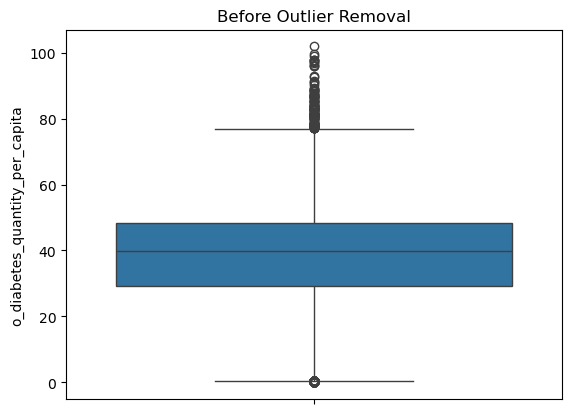

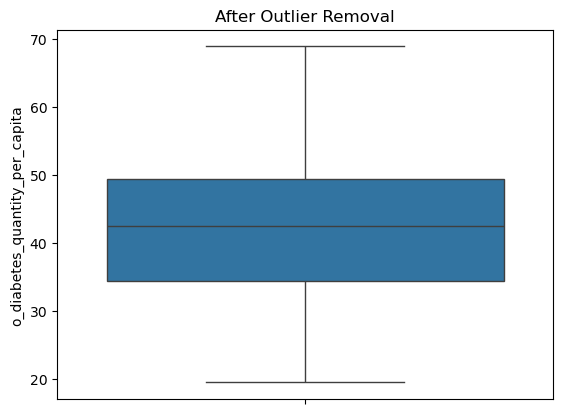

In [29]:
#Visualization of Numeric outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(updated_2019_data['o_diabetes_quantity_per_capita'])
plt.title("Before Outlier Removal")
plt.show()

sns.boxplot(clean_2019_data['o_diabetes_quantity_per_capita'])
plt.title("After Outlier Removal")
plt.show()


In [30]:
# General Information
print("Dataset Shape:", clean_2019_data.shape)  # Get the number of rows and columns
print("\nData Types and Non-null Counts:")
print(clean_2019_data.info())  # Get data types and number of non-null values

# Summary Statistics for Numeric Data
print("\nSummary Statistics for Numeric Columns:")
print(clean_2019_data.describe())  # Get summary statistics (mean, median, std, etc.) for numerical data


Dataset Shape: (147, 168)

Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 4550 to 28439
Columns: 168 entries, geography code to o_anxiety_quantity_per_capita
dtypes: float64(165), object(3)
memory usage: 194.1+ KB
None

Summary Statistics for Numeric Columns:
          centroid_x     centroid_y  c_percent asian  c_percent black  \
count     147.000000     147.000000       147.000000       147.000000   
mean   432888.654074  348175.877136         0.013457         0.004956   
std     37052.144714   64840.085719         0.008611         0.004113   
min    353078.440657  160457.792709         0.000806         0.000000   
25%    411418.394920  305884.125826         0.007118         0.001913   
50%    437015.523598  351907.788839         0.011161         0.004029   
75%    454380.992446  398959.325228         0.017625         0.006964   
max    515974.925059  457333.697557         0.039041         0.024820   

       c_percent mixed  c_percent white

In [31]:
# Check for missing values
missing_values = clean_2019_data.isnull().sum()

# If there are missing values, display the count; otherwise, print "No missing values"
if missing_values.any():  # Check if there are any missing values
    print("\nMissing Values Count:")
    print(missing_values[missing_values > 0])  # Display columns with missing values
else:
    print("\nNo missing values in the dataset.")



No missing values in the dataset.


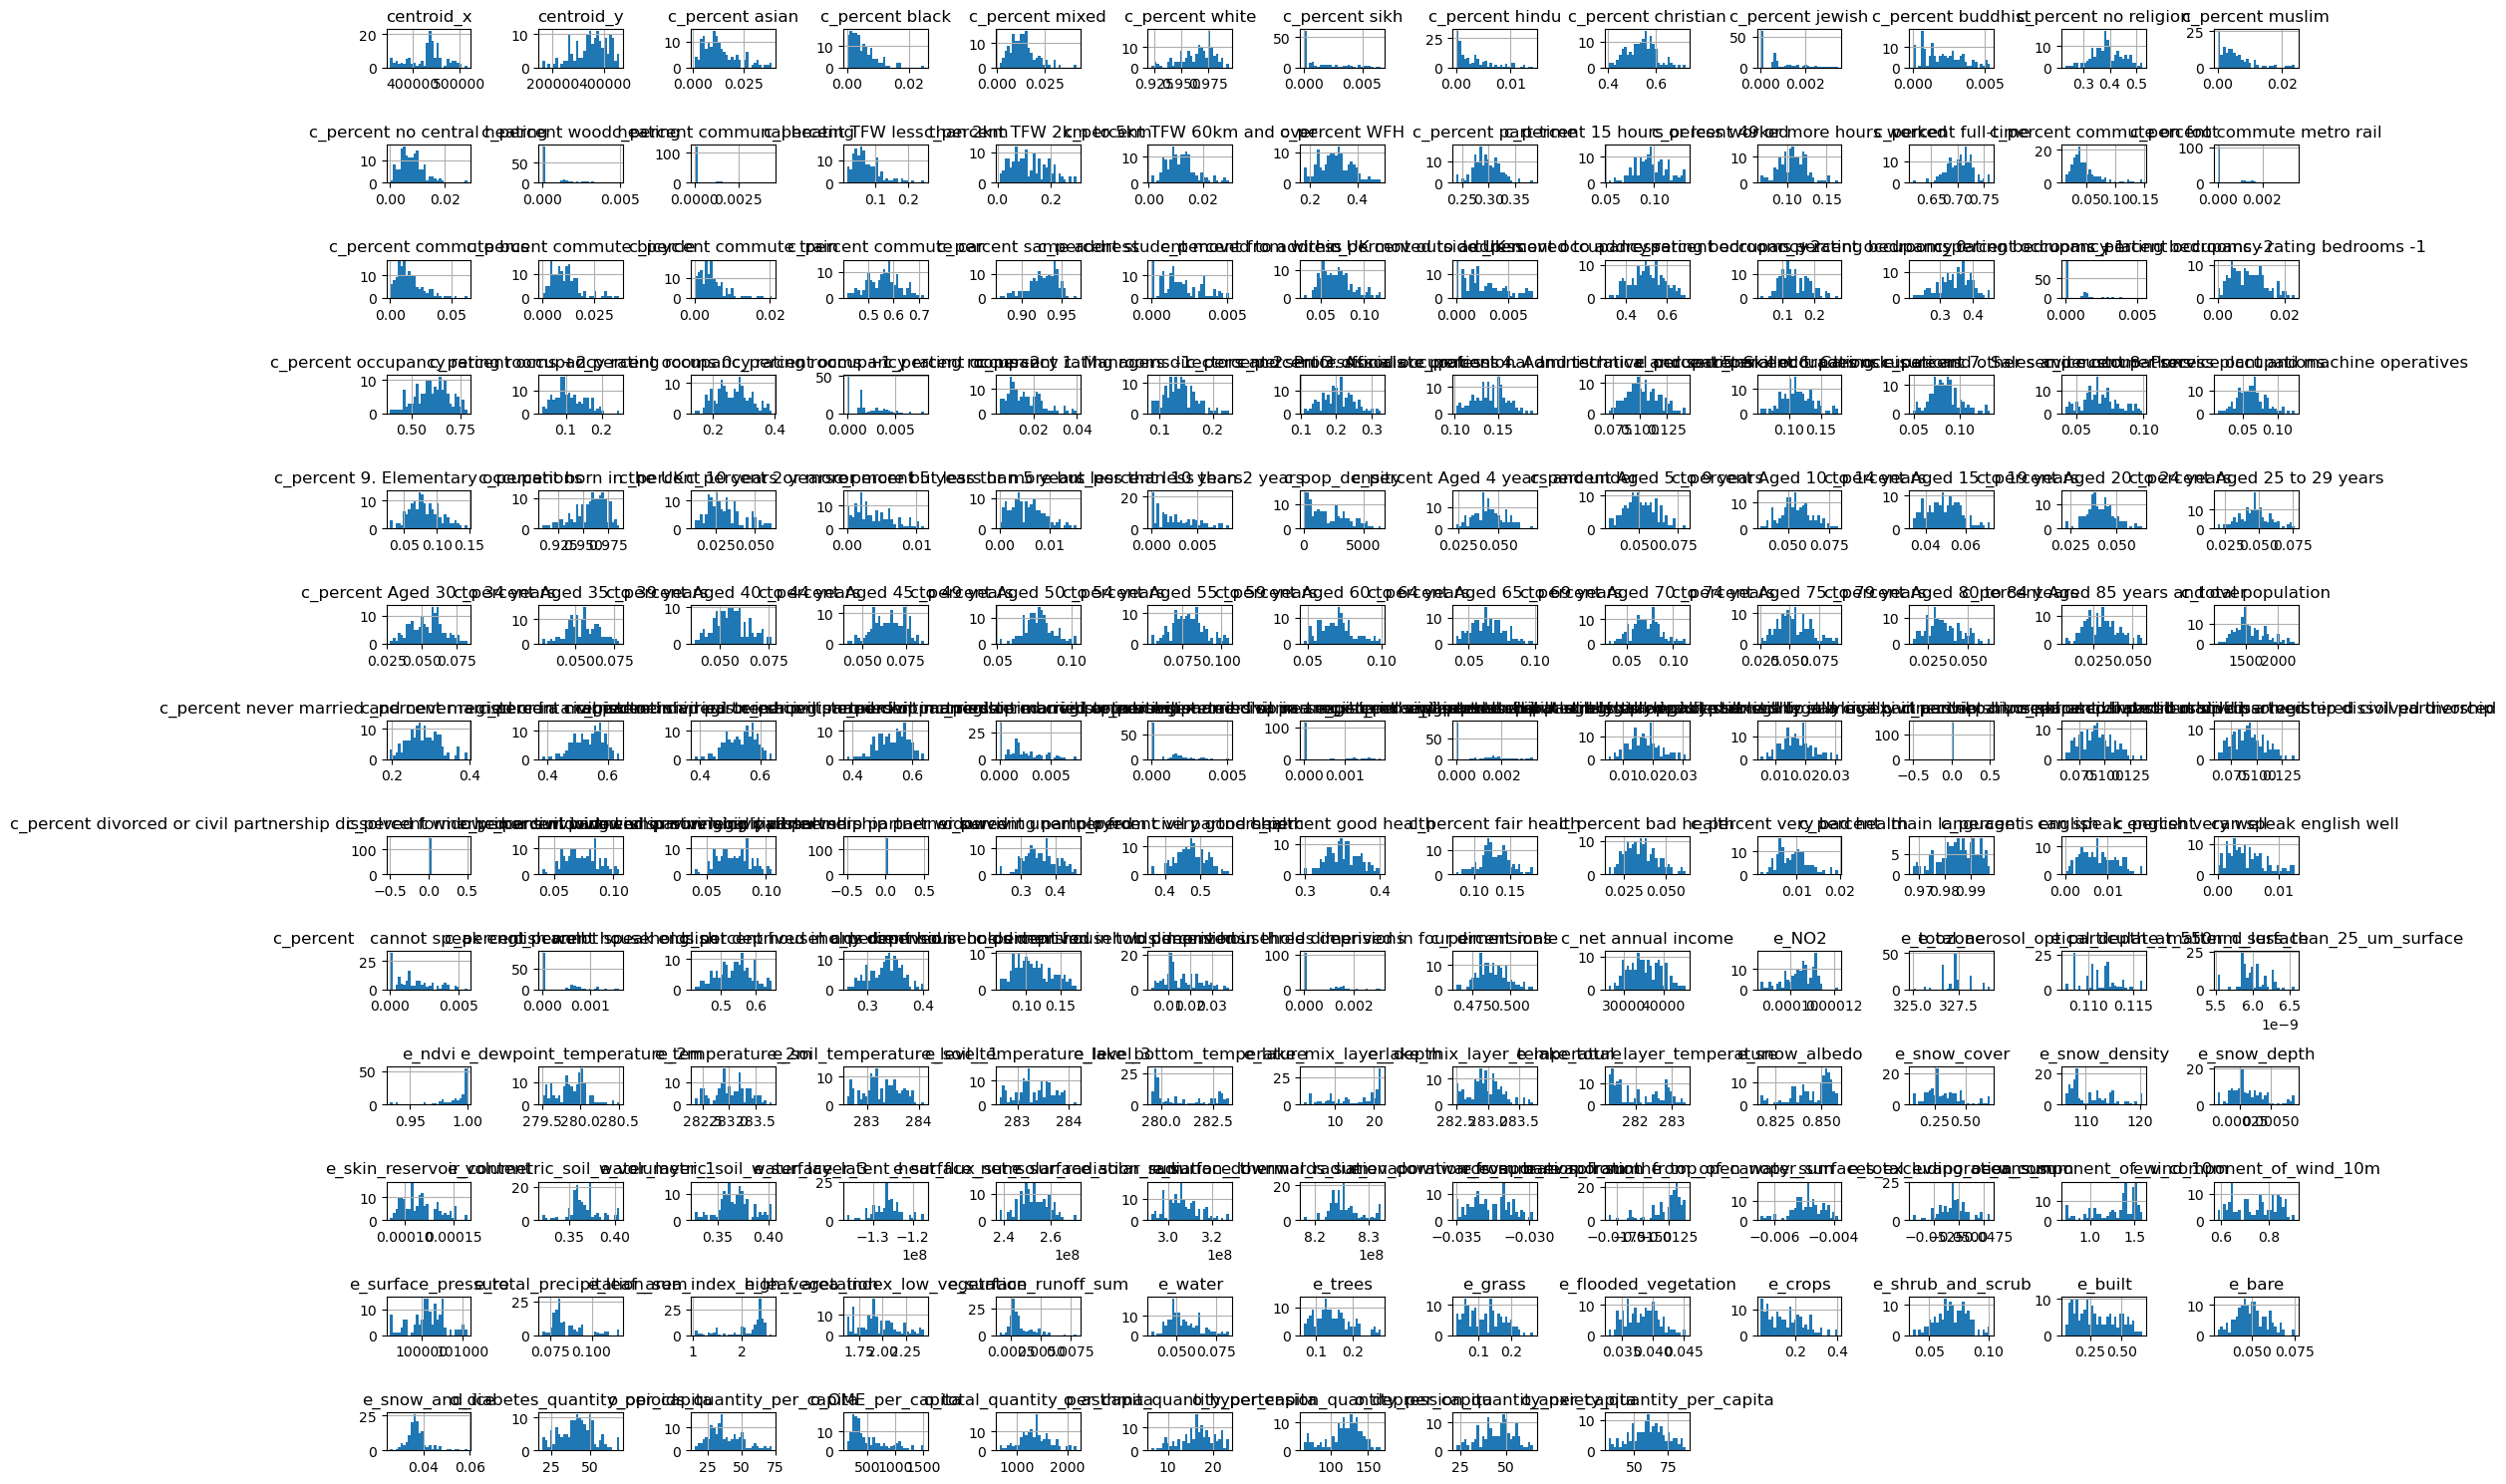

In [32]:
#Visualize Data Distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical columns
clean_2019_data.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

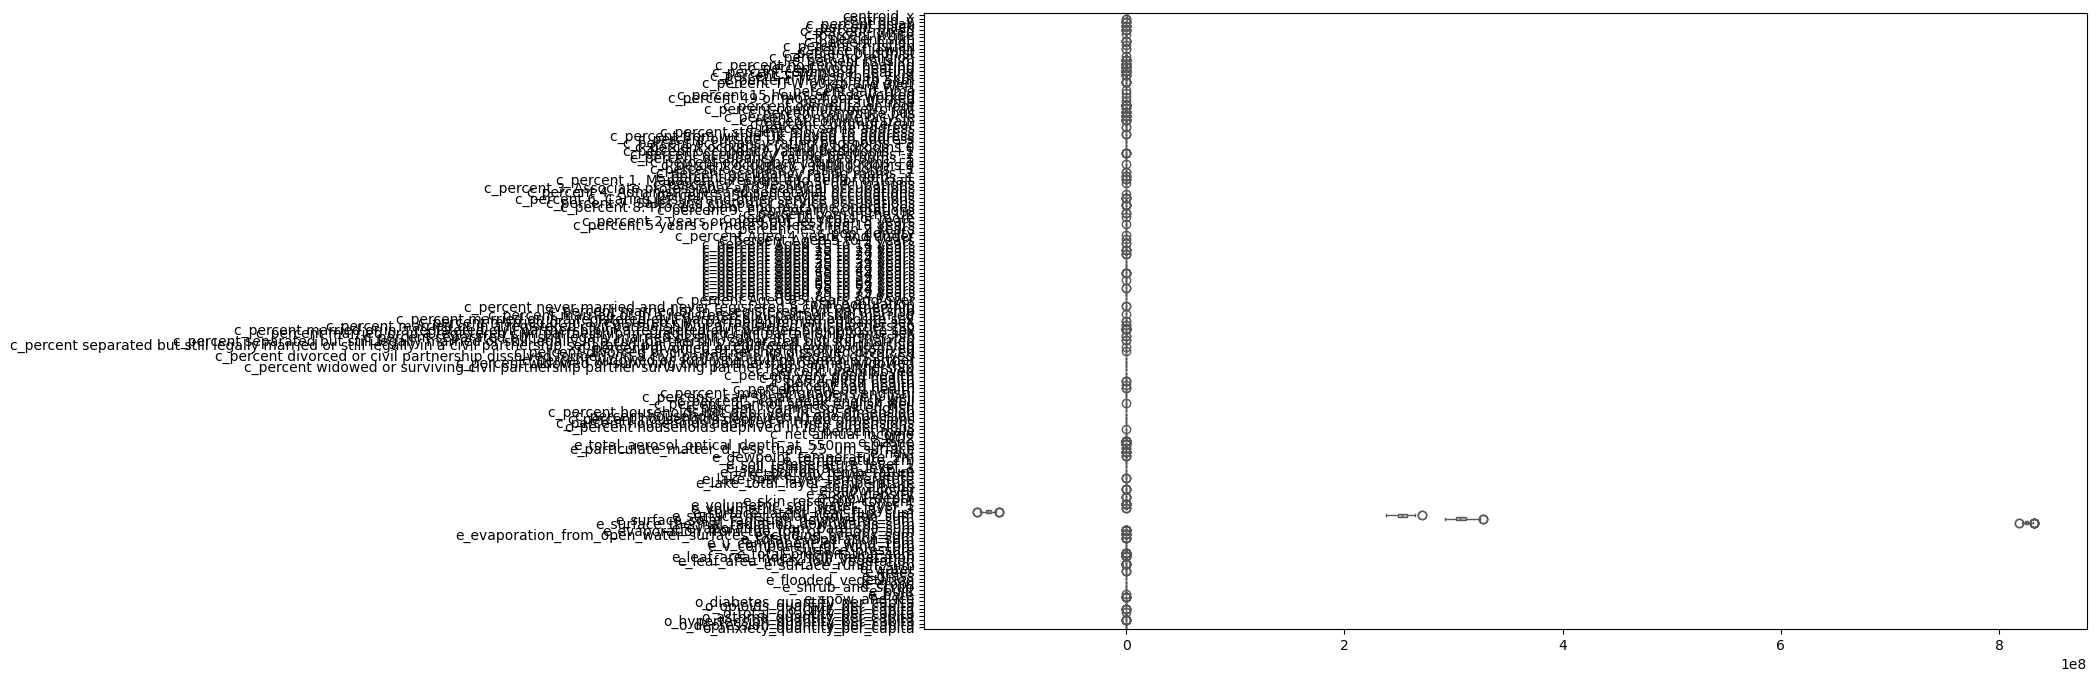

In [19]:
# Box plots to check for any remaining outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=clean_2019_data, orient='h', palette="Set2")
plt.show()


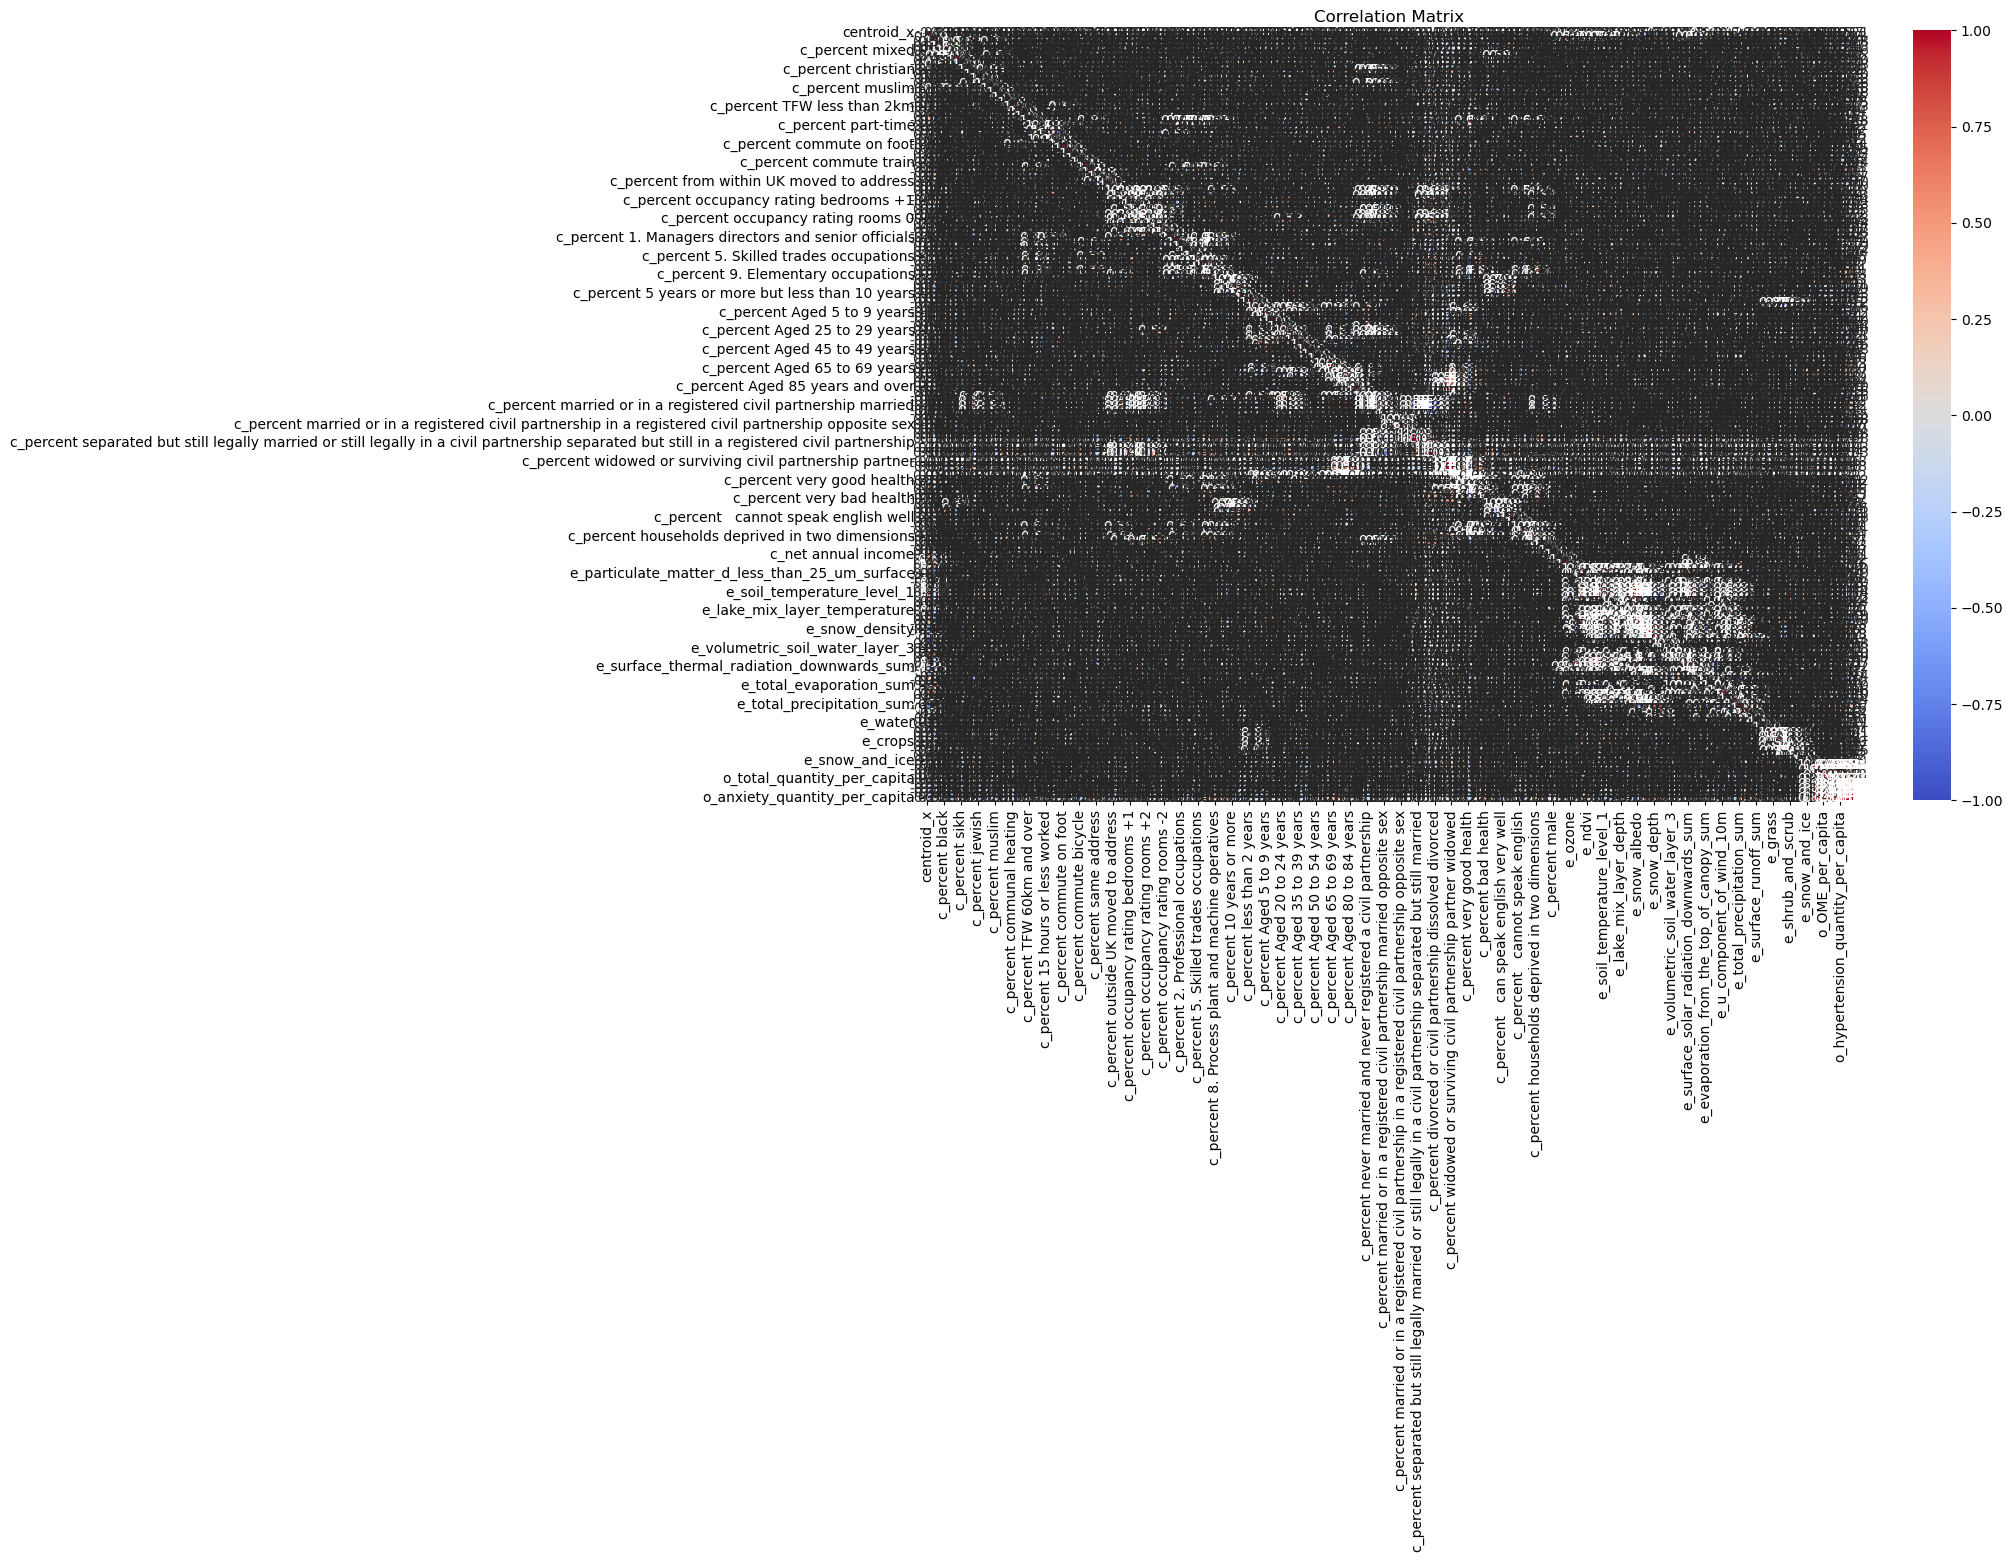

In [21]:
# Correlation Matrix - Only for numeric columns
numeric_df = clean_2019_data.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_df.corr()  # Compute correlation matrix on numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


C:\Users\Vineetha Burra\AppData\Local\Temp\ipykernel_16908\2910725511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=col, palette='Set2')


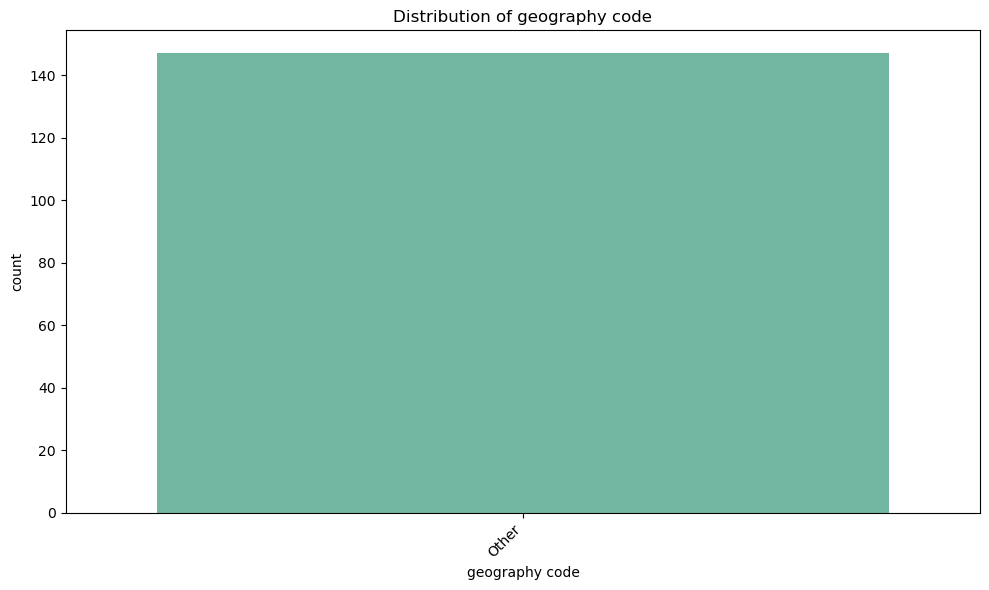

C:\Users\Vineetha Burra\AppData\Local\Temp\ipykernel_16908\2910725511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=col, palette='Set2')


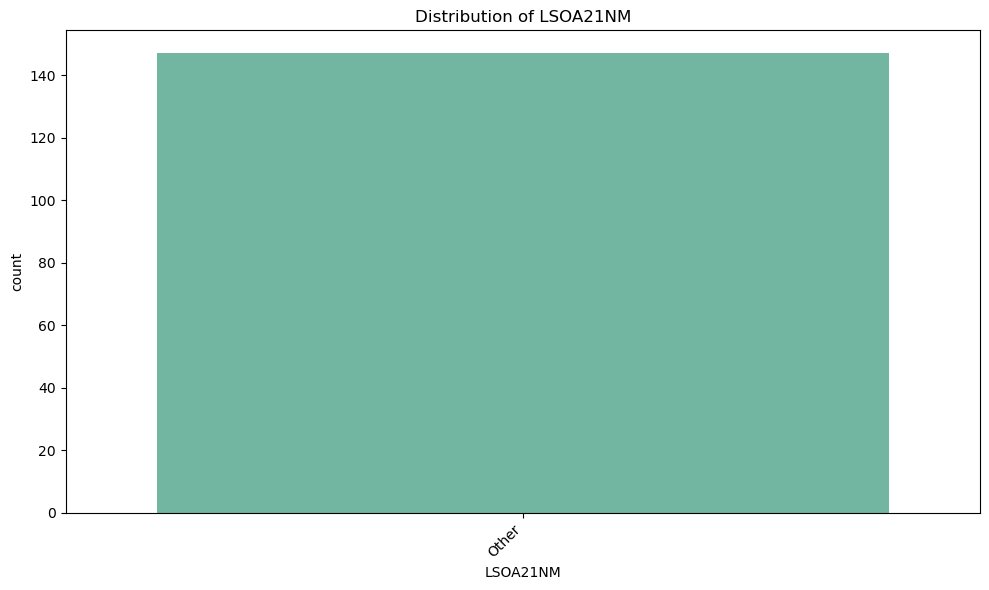

C:\Users\Vineetha Burra\AppData\Local\Temp\ipykernel_16908\2910725511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=col, palette='Set2')


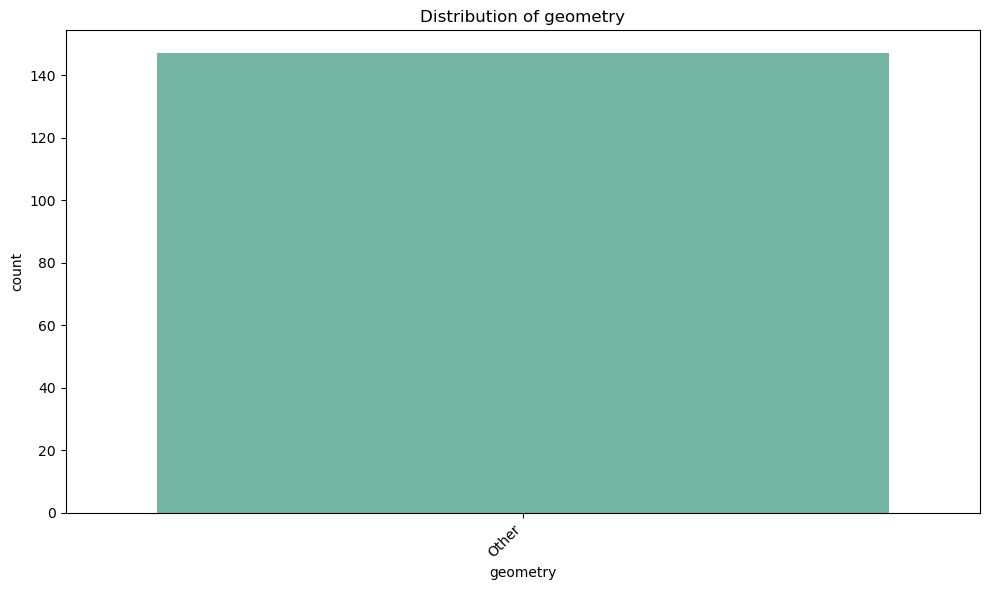

In [33]:
# For categorical columns, you can analyze and visualize the distribution
non_numeric_cols = clean_2019_data.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_clean, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

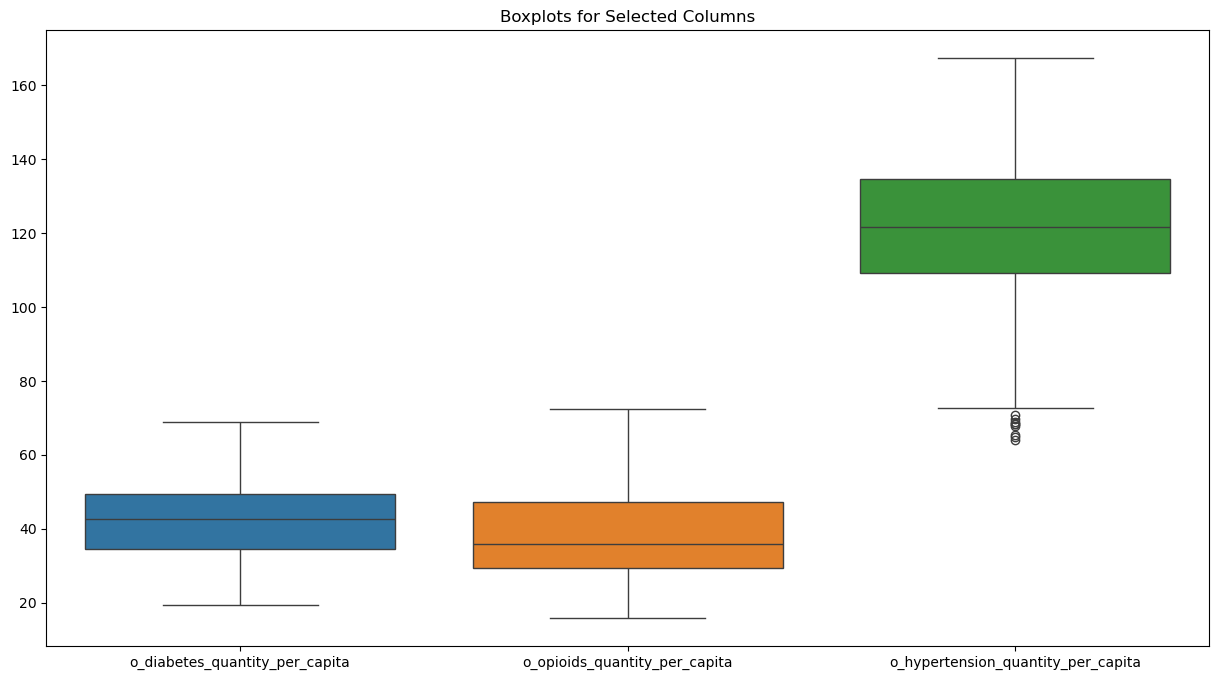

In [35]:
# Boxplots after removing outliers (for some key columns)
plt.figure(figsize=(15, 8))
sns.boxplot(data=clean_2019_data[['o_diabetes_quantity_per_capita', 
                           'o_opioids_quantity_per_capita', 
                           'o_hypertension_quantity_per_capita']])
plt.title("Boxplots for Selected Columns")
plt.show()
